In [2]:
import csv
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import Series
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
from pandas import datetime
from pandas import DataFrame
#from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels import api as sm

In [3]:
import pandas as pd

In [4]:
taxi=pd.read_csv('C:\Users\Yash\Desktop\ISB Documents\Practicum\Practicum 3\yellow_tripdata_2017-01.csv')

In [5]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [6]:
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime']).dt.date


In [7]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [8]:
grouped = taxi.groupby(['tpep_pickup_datetime'])

In [9]:
result = grouped['total_amount'].agg(['count'])

In [10]:
result.head()

,count
tpep_pickup_datetime,
2017-01-01,281263
2017-01-02,224893
2017-01-03,278099
2017-01-04,289301
2017-01-05,324421


In [11]:
print(result.describe())

               count
count      31.000000
mean   313229.806452
std     29973.871495
min    224893.000000
25%    292923.000000
50%    318251.000000
75%    330748.000000
max    368391.000000


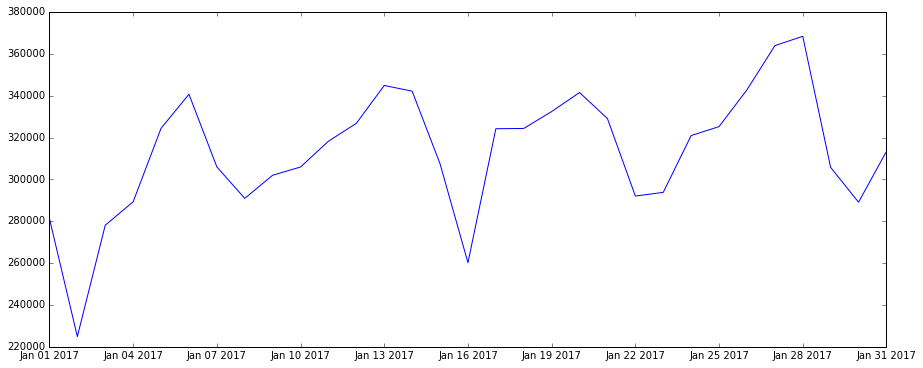

In [13]:
plt.plot(result)

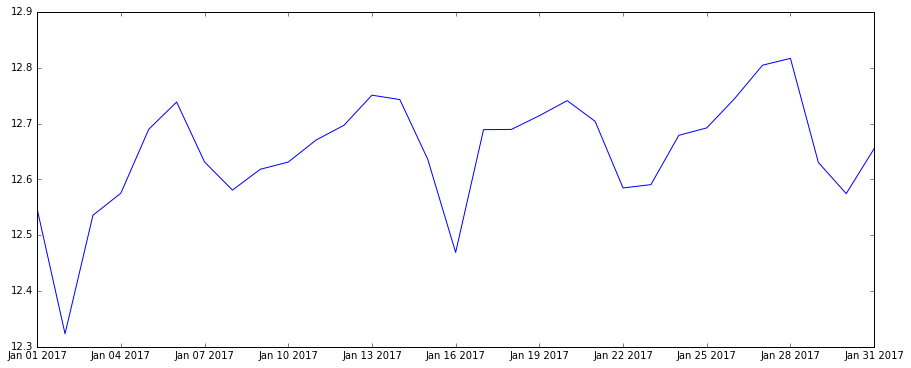

In [14]:
ts_log = np.log(result)
plt.plot(ts_log)

C:\Users\Yash\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  if __name__ == '__main__':


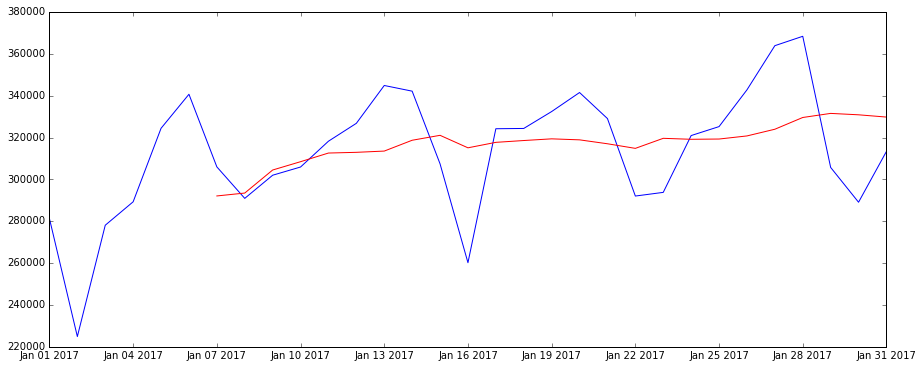

In [15]:
moving_avg = pd.rolling_mean(result,7)
plt.plot(result)
plt.plot(moving_avg, color='red')

C:\Users\Yash\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  if __name__ == '__main__':


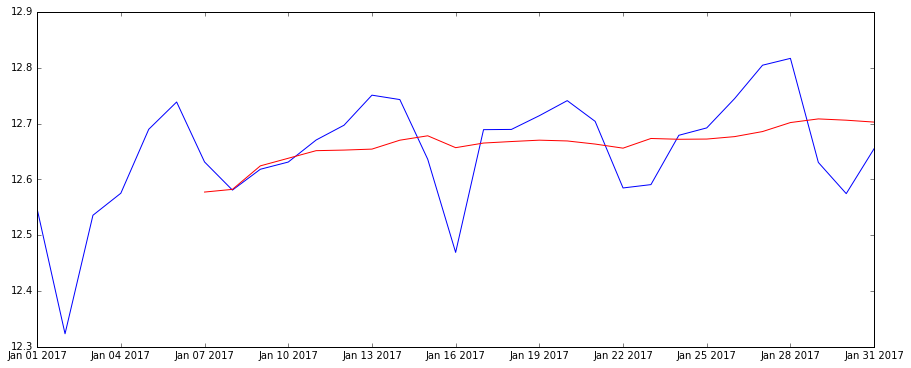

In [16]:
moving_avg = pd.rolling_mean(ts_log,7)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

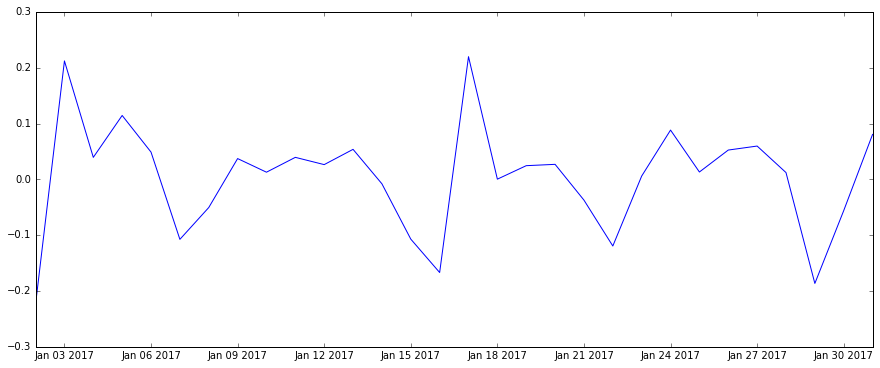

In [17]:
###Eliminating Trend and Seasonality using differencing

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

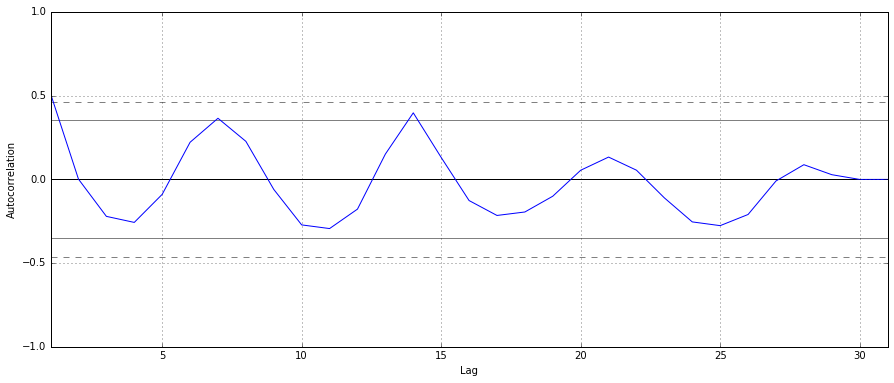

In [18]:
## using ARIMA Model
autocorrelation_plot(result)
pyplot.show()

In [24]:
# fit model
model = ARIMA(result, order=(1,1,0))
#model_fit = model.fit(disp=0)
#print(model.summary())
# plot residual errors
#residuals = DataFrame(model.resid)
#residuals.plot()
#pyplot.show()
#residuals.plot(kind='kde')
#pyplot.show()
#print(residuals.describe())